In [1]:
# Importar las bibliotecas necesarias
import tensorflow as tf
from tensorflow.keras import layers, models

In [2]:
# Definir la arquitectura de la CNN
model = models.Sequential([
    # Capa convolucional con 32 filtros de tamaño 3x3, función de activación ReLU
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    # Capa de MaxPooling para reducir la dimensionalidad
    layers.MaxPooling2D((2, 2)),
    # Capa convolucional con 64 filtros de tamaño 3x3, función de activación ReLU
    layers.Conv2D(64, (3, 3), activation='relu'),
    # Capa de MaxPooling para reducir la dimensionalidad
    layers.MaxPooling2D((2, 2)),
    # Capa convolucional con 64 filtros de tamaño 3x3, función de activación ReLU
    layers.Conv2D(64, (3, 3), activation='relu')
])


In [3]:
# Agregar capas completamente conectadas para clasificación
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # Capa de salida con 10 neuronas para clasificación de 10 clases

In [4]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
# Imprimir la arquitectura del modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [6]:
# Importar el conjunto de datos MNIST
from tensorflow.keras.datasets import mnist

In [7]:
# Cargar el conjunto de datos y dividirlo en conjuntos de entrenamiento y prueba
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 15s 1us/step


In [8]:
# Preprocesamiento de los datos: Normalizar las imágenes y redimensionarlas para que tengan la forma adecuada
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

In [9]:
# Entrenar el modelo
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5


750/750 [==============================] - 10s 12ms/step - loss: 0.2093 - accuracy: 0.9364 - val_loss: 0.0776 - val_accuracy: 0.9755
Epoch 2/5
750/750 [==============================] - 8s 11ms/step - loss: 0.0567 - accuracy: 0.9820 - val_loss: 0.0565 - val_accuracy: 0.9826
Epoch 3/5
750/750 [==============================] - 8s 11ms/step - loss: 0.0401 - accuracy: 0.9876 - val_loss: 0.0432 - val_accuracy: 0.9877
Epoch 4/5
750/750 [==============================] - 8s 11ms/step - loss: 0.0315 - accuracy: 0.9900 - val_loss: 0.0376 - val_accuracy: 0.9887
Epoch 5/5
750/750 [==============================] - 8s 11ms/step - loss: 0.0232 - accuracy: 0.9924 - val_loss: 0.0401 - val_accuracy: 0.9877


In [10]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0351 - accuracy: 0.9888
Test accuracy: 0.9887999892234802


In [11]:
import numpy as np
import matplotlib.pyplot as plt



# Función para mostrar una imagen junto con la etiqueta predicha y la etiqueta verdadera
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{predicted_label} ({true_label})", color=color)

# Función para mostrar el gráfico de barras de las predicciones
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')




In [12]:
# Realizar predicciones en el conjunto de prueba
predictions = model.predict(test_images)

313/313 [==============================] - 1s 4ms/step


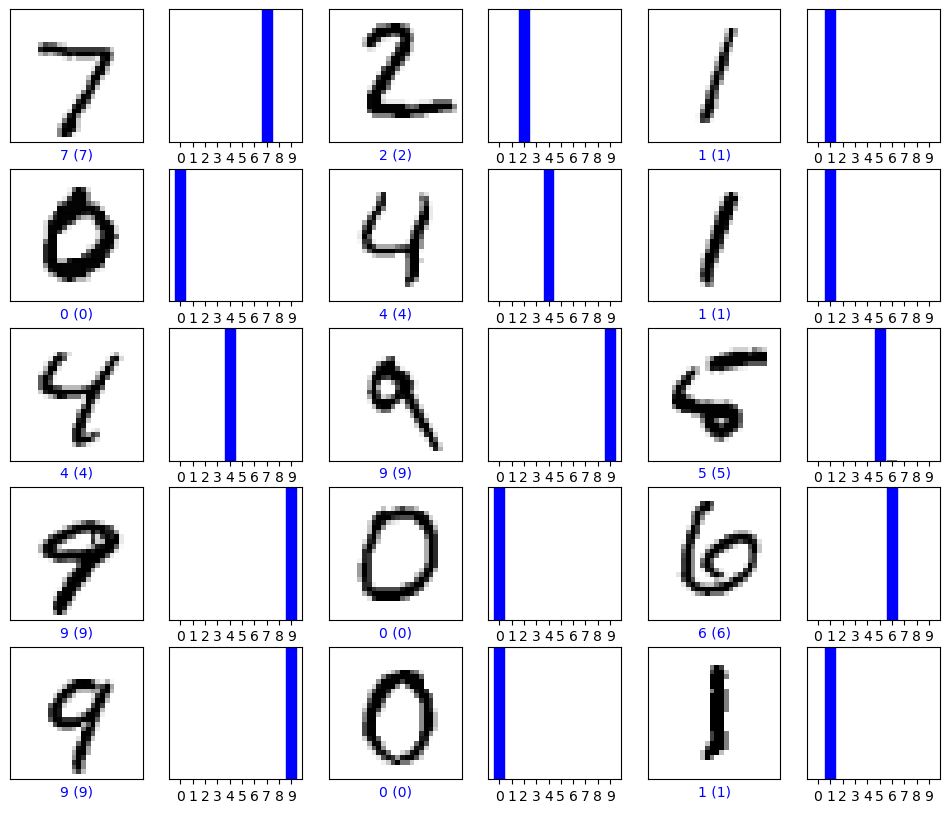

In [13]:
# Visualizar las primeras imágenes del conjunto de prueba, junto con las predicciones
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()